In [56]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [41]:
path = "../data/Food_Supply_kcal_Data.csv"
df = pd.read_csv(path)

In [42]:
df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.000290,0.000013,0.000076,0.000200,31427000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.026804,0.003093,0.020619,0.003093,97000.0,%


In [43]:
df['Rec_Rate'] = df[['Confirmed', 'Active', 'Recovered']].apply(lambda x: (x['Recovered']/(x['Confirmed']-x['Active']))*100, axis=1)
df = df.sort_values(by=['Rec_Rate'], ascending=False)

In [52]:
df['Total Confirmed'] = df[['Confirmed', 'Population']].apply(lambda row: (row['Confirmed']/100)*row['Population'], axis=1)


In [54]:
#top ranked countries with highest recovery rate with cases more than  
df['Country'].loc[df['Total Confirmed']>= 100000].head(10)

133                  Saudi Arabia
29                          Chile
126            Russian Federation
154                        Turkey
56                        Germany
68                          India
70     Iran (Islamic Republic of)
120                          Peru
20                         Brazil
100                        Mexico
Name: Country, dtype: object

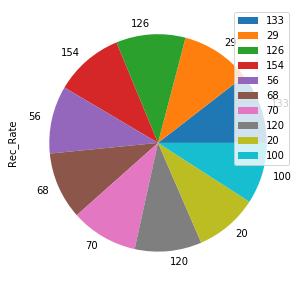

In [68]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].head(10).plot.pie(y='Rec_Rate', figsize=(5, 5))

In [74]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].head(4)

,Country,Rec_Rate
133,Saudi Arabia,99.031675
29,Chile,98.508931
126,Russian Federation,97.479354
154,Turkey,96.711084


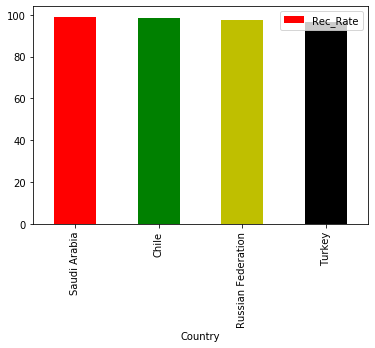

In [87]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].head(4).plot.bar(x='Country', y='Rec_Rate', color = ['r', 'g', 'y', 'k'])

In [88]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].tail(4)

,Country,Rec_Rate
74,Italy,83.028097
161,United States of America,79.948813
51,France,70.876657
159,United Kingdom,2.959583


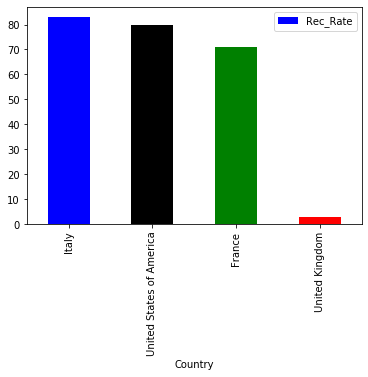

In [90]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].tail(4).plot.bar(x='Country', y='Rec_Rate', color = ['b', 'k', 'g', 'r'])